In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [4]:
# Checking the shape of the dataset
print(f'There are {dataset.shape[0]} rows available in the dataset')
print(f'There are {dataset.shape[1]} columns available in the dataset')

There are 2000 rows available in the dataset
There are 9 columns available in the dataset


In [5]:
print(f'The available feature columns present in our dataset are:-','\n\n', dataset.columns)

The available feature columns present in our dataset are:- 

 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Domain Analysis

- Pregnancies: This column refers to the number of times a woman has been pregnant.
- Glucose: This column refers to the blood sugar level of a person.
- BloodPressure: This column refers to the blood pressure level of a person.
- SkinThickness: This column refers to the skin thickness of a person.
- Insulin: This column refers to the insulin level of a person.
- BMI: This column refers to the body mass index of a person.
- DiabetesPedigreeFunction: This column refers to the diabetes pedigree function of a person.
- Age: This column refers to the age of a person.
- Outcome: This column refers to the outcome of a person's diabetes test, which can be either "0" for no diabetes or "1" for diabetes.

- Pregnancies: The number of times a woman has been pregnant is a risk factor for diabetes.
- Glucose: The level of glucose in the blood is a measure of how well the body is able to process sugar. High blood sugar levels are a sign of diabetes.
- BloodPressure: High blood pressure is another risk factor for diabetes.
- SkinThickness: The thickness of the skin at the back of the arm is a measure of insulin resistance. Insulin resistance is a condition where the body's cells do not respond properly to insulin, which can lead to diabetes.
- Insulin: The level of insulin in the blood is a measure of how well the body is able to produce and use insulin. Low levels of insulin can be a sign of diabetes.
- BMI: Body mass index (BMI) is a measure of body fat. People with a high BMI are at an increased risk of developing diabetes.
- DiabetesPedigreeFunction: The DiabetesPedigreeFunction is a measure of the genetic risk of developing diabetes. People with a high DiabetesPedigreeFunction are at an increased risk of developing diabetes.
- Age: Age is also a risk factor for diabetes. The risk of developing diabetes increases with age.

# Exploratory Data Analysis

## Bivariate analysis

In [6]:
dataset.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

- In the pregnancy column we can see that the max value for the pregnancy is 17 which is very uncommon. So for this we can take it as the outliers
- In Glucose, Blood Pressure, Skin Thickness, Insulin, BMI have corrupted values present in the dataset as they have 0 as the minimum value for each columns. which is impossible to have for a human being

In [7]:
# sns.pairplot(dataset)

<Axes: xlabel='Pregnancies', ylabel='count'>

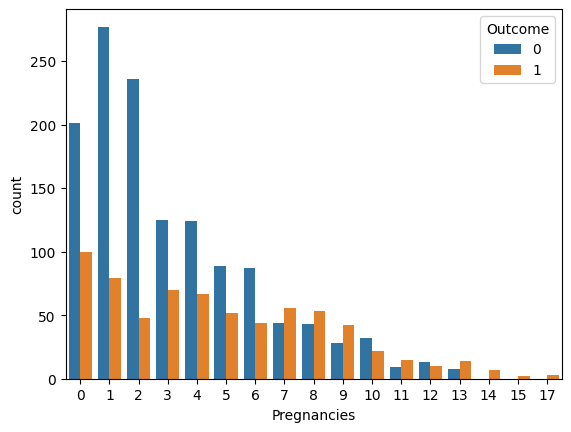

In [8]:
sns.countplot(data= dataset, x=dataset.Pregnancies, hue='Outcome')

- Graph clearly shows that woman having less pregnancy count is less prone to diebetes attack
- Woman having pregancies above the seven have higher chances to have the diebetes

<Axes: xlabel='Glucose', ylabel='Count'>

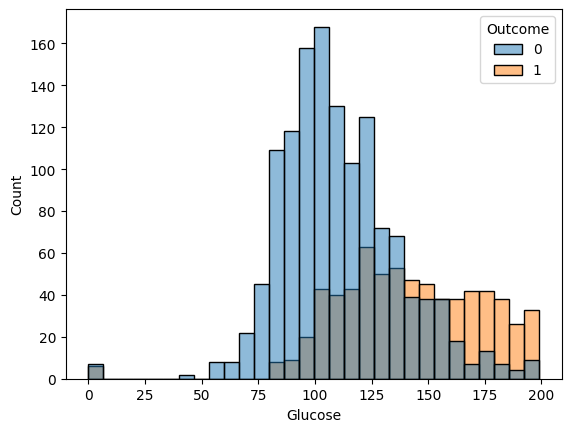

In [9]:
sns.histplot(data= dataset, x=dataset.Glucose, hue='Outcome')

- In graph we can clearly see that person having Glucose level above 130 is likely  to prone with diebetes

<Axes: xlabel='BloodPressure', ylabel='Count'>

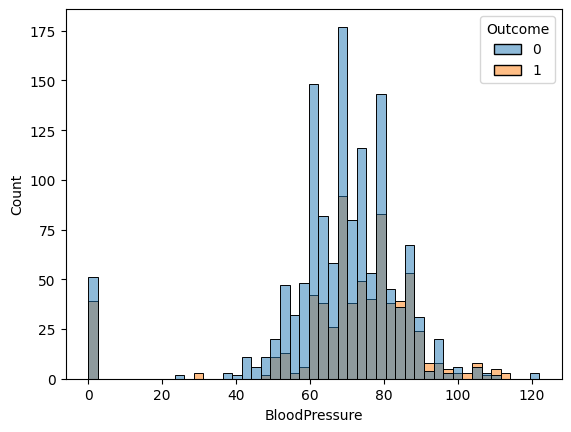

In [10]:
sns.histplot(data= dataset, x=dataset.BloodPressure, hue='Outcome')

- The graph shows that people having normal Blood Pressure ranges above 90 is likely to prone with diebetes

<Axes: xlabel='SkinThickness', ylabel='Count'>

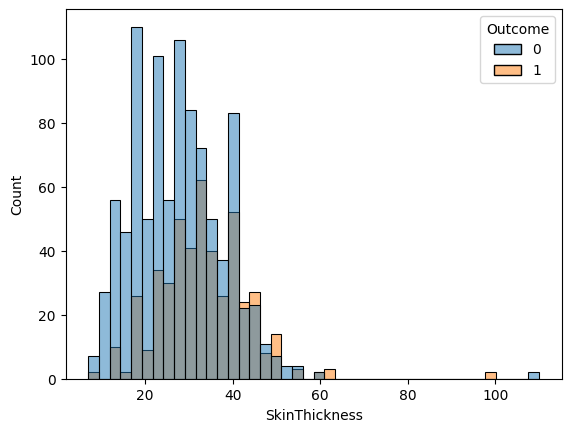

In [11]:
sns.histplot(data= dataset, x=dataset.SkinThickness.replace(0, np.nan).dropna(), hue='Outcome')

- The graph shows that people having skin thickness above 45 is likely to prone with diebetes

<Axes: xlabel='Insulin', ylabel='Count'>

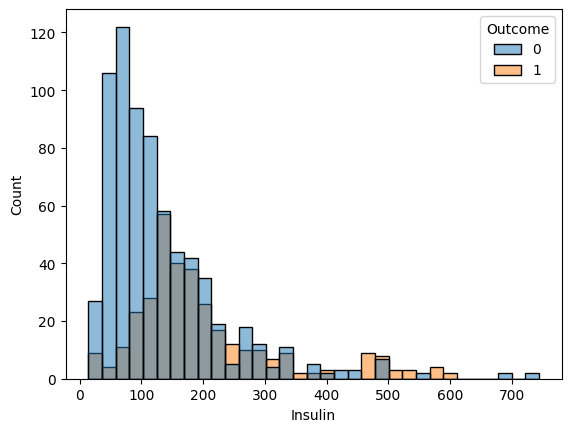

In [12]:
sns.histplot(data= dataset, x=dataset.Insulin.replace(0, np.nan).dropna(), hue='Outcome')

- Person having the insulin count more 250 have higher chances to get diebetes

<Axes: xlabel='Insulin', ylabel='Glucose'>

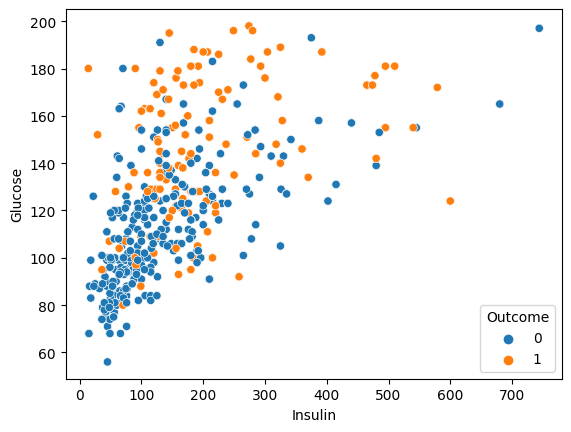

In [13]:
sns.scatterplot(data=dataset, x= dataset.Insulin.replace(0, np.nan).dropna(), y= dataset.Glucose.replace(0, np.nan).dropna(), hue='Outcome')

- Here in this scatterplot graph we can see that person having insulin greater than 150 and glucose level higher than 120 have higher chances that person is likely to prone with diebetes

<Axes: xlabel='BMI', ylabel='Count'>

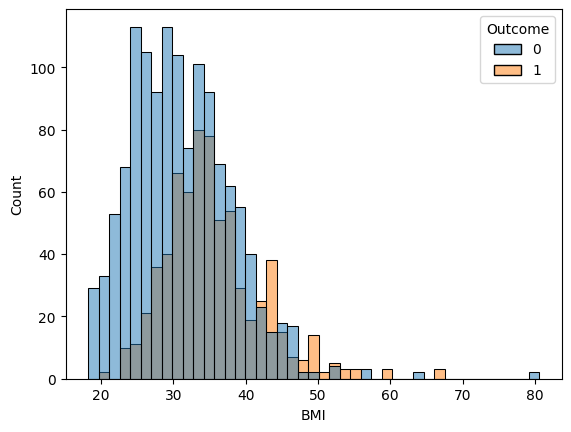

In [14]:
sns.histplot(data= dataset, x=dataset.BMI.replace(0, np.nan).dropna(), hue='Outcome')

- Person having BMI above the 40 have higher chances to get diebetes

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

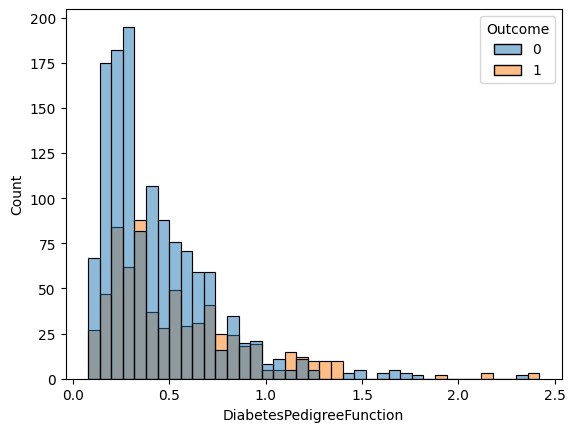

In [15]:
sns.histplot(data= dataset, x=dataset.DiabetesPedigreeFunction, hue='Outcome')

- Person having Diabetes pedigree function ranges above 1 can have diebetes

<Axes: xlabel='Age', ylabel='Count'>

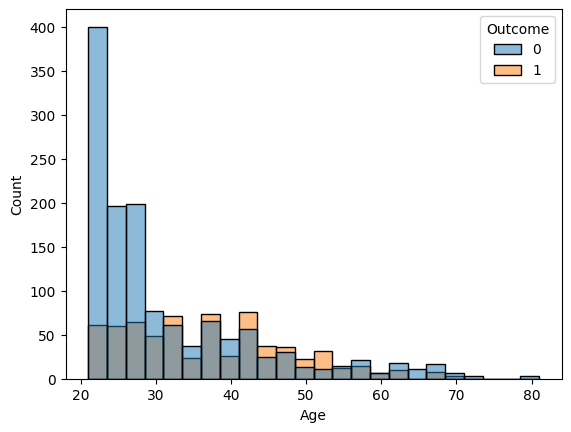

In [16]:
sns.histplot(data= dataset, x=dataset.Age, hue='Outcome')

- As Age increases the chances of having diebetes is increses.
- More likely above 30 age having diebetes is common in the world.

In [17]:
from ydata_profiling import ProfileReport
report = ProfileReport(dataset)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing 

In [18]:
# Here we can see that we have 9 feature columns and all feature columns are in Numerical datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [19]:
# Here there are total 1256 rows which are duplicated. So we have to drop our duplicated columns
dataset.duplicated().sum()

1256

In [20]:
# droppping the duplicated columns
dataset.drop_duplicates(inplace=True)

In [21]:
# checking the shape of the dataset
dataset.shape

(744, 9)

In [22]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [23]:
# checking the Null Values. 
# No Null Values are present is the databases
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

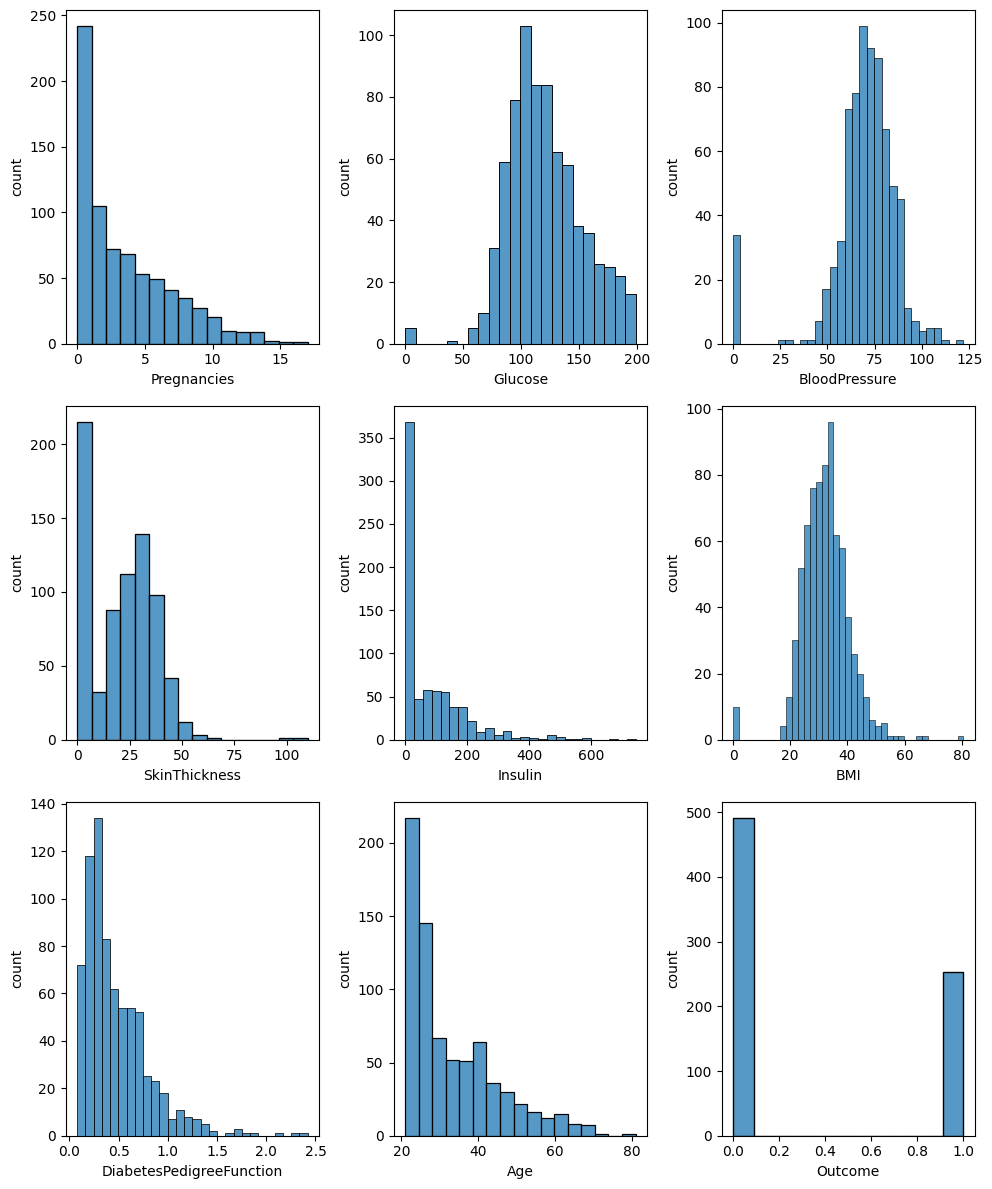

In [24]:
plt.figure(figsize=(10,12))
plotnumber = 1

for column in dataset:
    if plotnumber <=10:
        ax = plt.subplot(3,3, plotnumber)
        sns.histplot(dataset[column])
        # plt.xlabel(dataset[column])
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

In [25]:
# So we have columns that have corrupted values present in the dataset ie. GLucose, Blood Pressure, Skin Thickness, Insulin, BMI
# So We have to drop or smote our feature or impute the median values in the feature columns

In [26]:
# In Glucose feature column we have very less Zeros present in the dataset so we will impute Median values in their place
dataset.loc[dataset.Glucose == 0, 'Glucose'] = np.median(dataset.Glucose)

In [27]:
# Checking the values is changed or not
dataset.loc[dataset.Glucose == 0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [28]:
# In Blood Pressure feature column we have less zeroes present in it so we will imput median value
dataset.loc[dataset.BloodPressure == 0, 'BloodPressure'] = np.median(dataset.BloodPressure)

In [29]:
dataset.loc[dataset.BloodPressure == 0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [30]:
# In Blood BMI feature column we have less zeroes present in it so we will imput median value
dataset.loc[dataset.BMI == 0, 'BMI'] = np.median(dataset.BMI)

In [31]:
dataset.loc[dataset.BMI == 0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [32]:
# We can also impute median value in Skin Thickness column because it has only 27% datapoint which zeroes in it 
dataset.loc[dataset.SkinThickness == 0, 'SkinThickness'] = np.median(dataset.SkinThickness)

In [33]:
dataset.loc[dataset.SkinThickness == 0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [34]:
# We can also impute median value in insulin column because it has only 47% datapoint which zeroes in it 
dataset.loc[dataset.Insulin == 0, 'Insulin'] = np.median(dataset.Insulin)

In [35]:
dataset.loc[dataset.Insulin == 0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

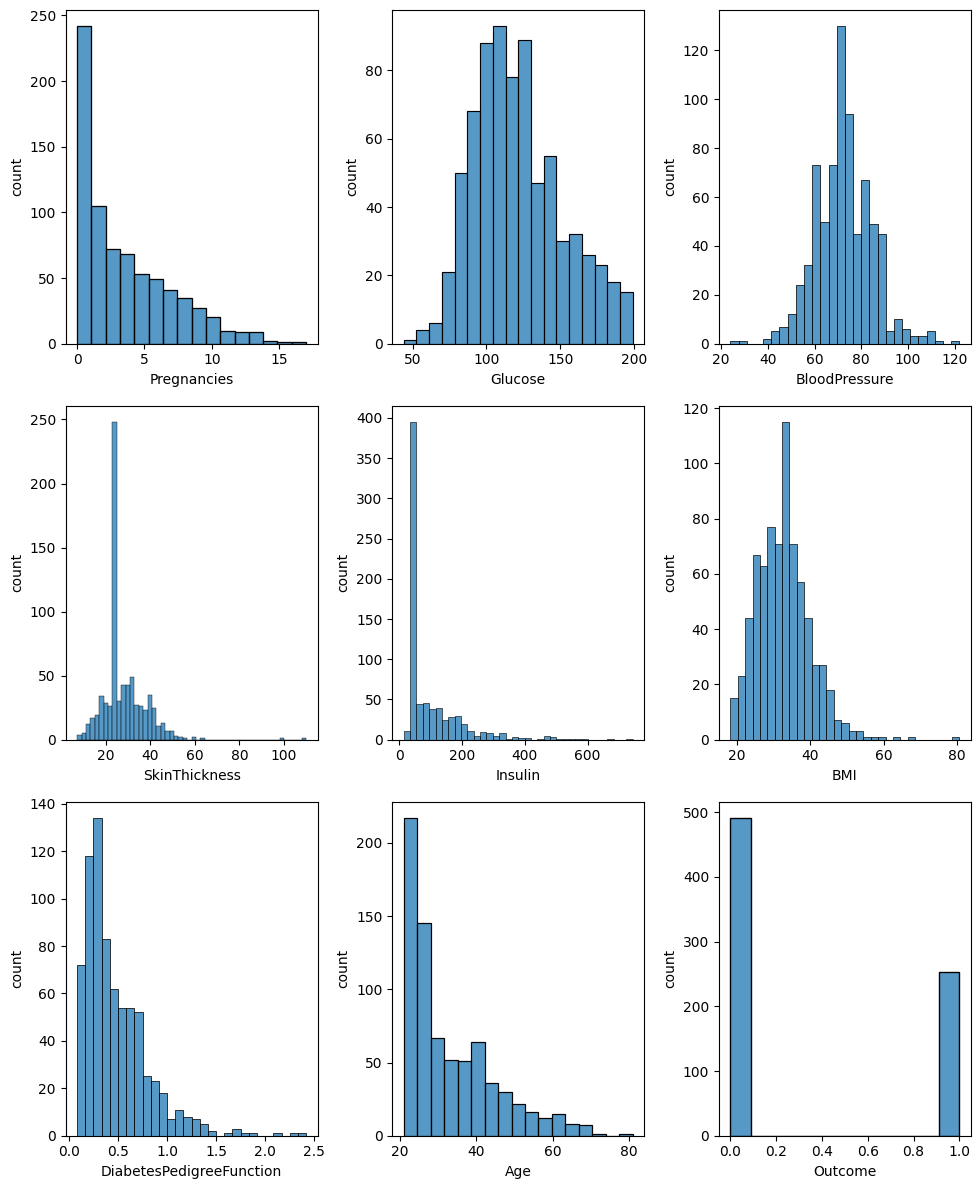

In [36]:
plt.figure(figsize=(10,12))
plotnumber = 1

for column in dataset:
    if plotnumber <=10:
        ax = plt.subplot(3,3, plotnumber)
        sns.histplot(dataset[column])
        # plt.xlabel(dataset[column])
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

In [37]:
# So here all the column feature are numerical datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [38]:
# Check For the outliers

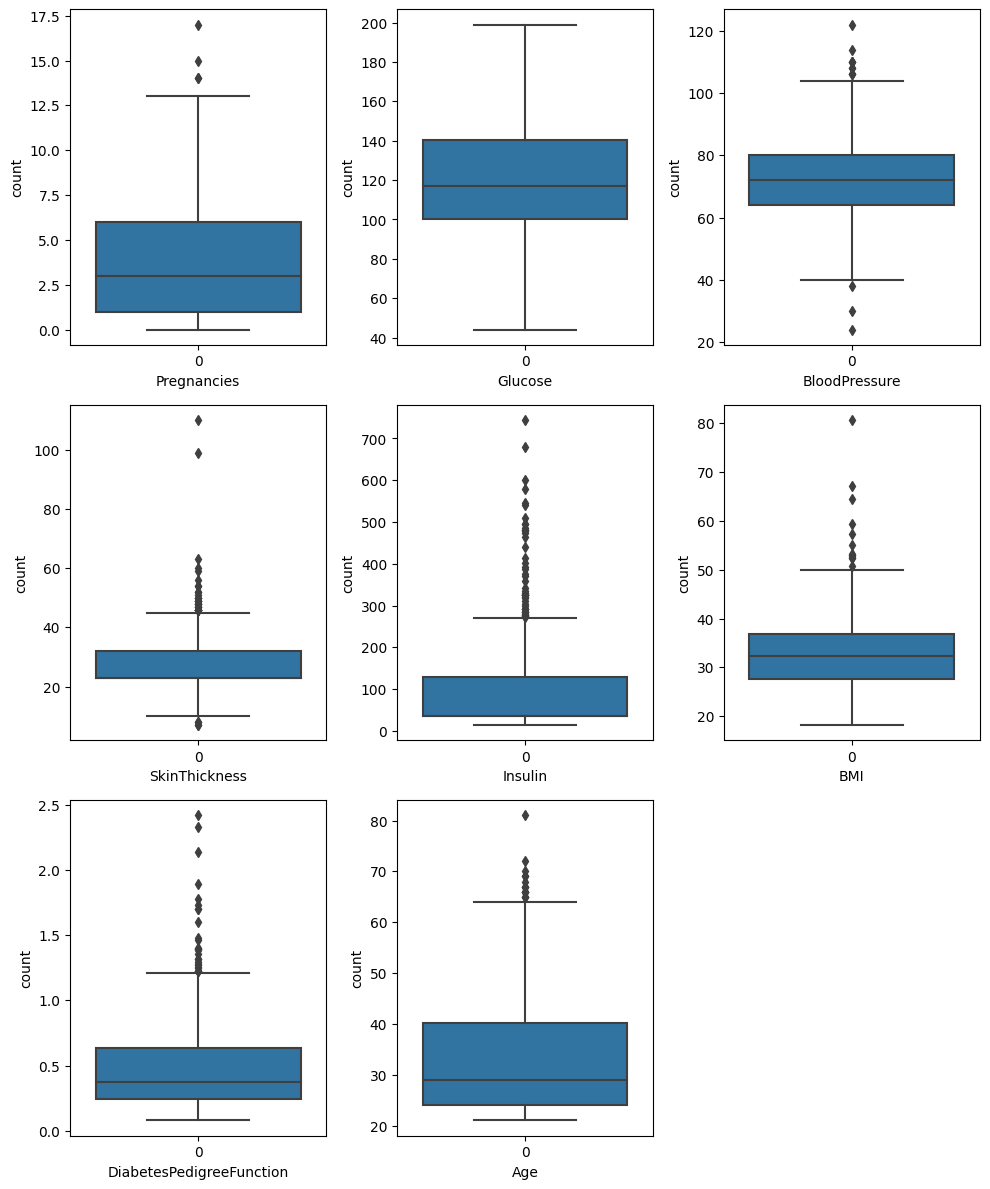

In [39]:
plt.figure(figsize=(10,12))
plotnumber = 1

for column in dataset.iloc[:,:8]:
    if plotnumber <=10:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(dataset[column])
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

In [40]:
# there lots of  outliers are present in dataset. 
# Mainly feature columns like Pregnacies, Blodd Preesure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age have ouliers are present the columns.

In [41]:
Q1 = dataset['Insulin'].quantile(0.25)
Q3 = dataset['Insulin'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['Insulin'] > upper_limit, 'Insulin'] = dataset['Insulin'].median()
dataset.loc[dataset['Insulin'] < lower_limit, 'Insulin'] = dataset['Insulin'].median()

In [42]:
print(dataset.loc[dataset['Insulin'] > upper_limit])
print(dataset.loc[dataset['Insulin'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [43]:
Q1 = dataset['Pregnancies'].quantile(0.25)
Q3 = dataset['Pregnancies'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['Pregnancies'] > upper_limit, 'Pregnancies'] = dataset['Pregnancies'].median()
dataset.loc[dataset['Pregnancies'] < lower_limit, 'Pregnancies'] = dataset['Pregnancies'].median()

In [44]:
print(dataset.loc[dataset['Pregnancies'] > upper_limit])
print(dataset.loc[dataset['Pregnancies'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [45]:
Q1 = dataset['BloodPressure'].quantile(0.25)
Q3 = dataset['BloodPressure'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['BloodPressure'] > upper_limit, 'BloodPressure'] = dataset['BloodPressure'].median()
dataset.loc[dataset['BloodPressure'] < lower_limit, 'BloodPressure'] = dataset['BloodPressure'].median()

In [46]:
print(dataset.loc[dataset['BloodPressure'] > upper_limit])
print(dataset.loc[dataset['BloodPressure'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [47]:
Q1 = dataset['SkinThickness'].quantile(0.25)
Q3 = dataset['SkinThickness'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['SkinThickness'] > upper_limit, 'SkinThickness'] = dataset['SkinThickness'].median()
dataset.loc[dataset['SkinThickness'] < lower_limit, 'SkinThickness'] = dataset['SkinThickness'].median()

In [48]:
print(dataset.loc[dataset['SkinThickness'] > upper_limit])
print(dataset.loc[dataset['SkinThickness'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [49]:
Q1 = dataset['BMI'].quantile(0.25)
Q3 = dataset['BMI'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['BMI'] > upper_limit, 'BMI'] = dataset['BMI'].median()
dataset.loc[dataset['BMI'] < lower_limit, 'BMI'] = dataset['BMI'].median()

In [50]:
print(dataset.loc[dataset['BMI'] > upper_limit])
print(dataset.loc[dataset['BMI'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [51]:
Q1 = dataset['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = dataset['DiabetesPedigreeFunction'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['DiabetesPedigreeFunction'] > upper_limit, 'DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].median()
dataset.loc[dataset['DiabetesPedigreeFunction'] < lower_limit, 'DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].median()

In [52]:
print(dataset.loc[dataset['DiabetesPedigreeFunction'] > upper_limit])
print(dataset.loc[dataset['DiabetesPedigreeFunction'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [53]:
Q1 = dataset['Outcome'].quantile(0.25)
Q3 = dataset['Outcome'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

dataset.loc[dataset['Outcome'] > upper_limit, 'Outcome'] = dataset['Outcome'].median()
dataset.loc[dataset['Outcome'] < lower_limit, 'Outcome'] = dataset['Outcome'].median()

In [54]:
print(dataset.loc[dataset['Outcome'] > upper_limit])
print(dataset.loc[dataset['Outcome'] < lower_limit])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [55]:
# Removing the outliers
# def remove_outliers(col_name):
#     Q1 = dataset[column].quantile(0.25)
#     Q3 = dataset[column].quantile(0.75)
    
#     IQR = Q3 - Q1
#     lower_limit = Q1 - (1.5*IQR)
#     upper_limit = Q3 + (1.5*IQR)
    
#     dataset.loc[dataset[column] > upper_limit, column] = dataset[column].median()
#     dataset.loc[dataset[column] < lower_limit, column] = dataset[column].median()

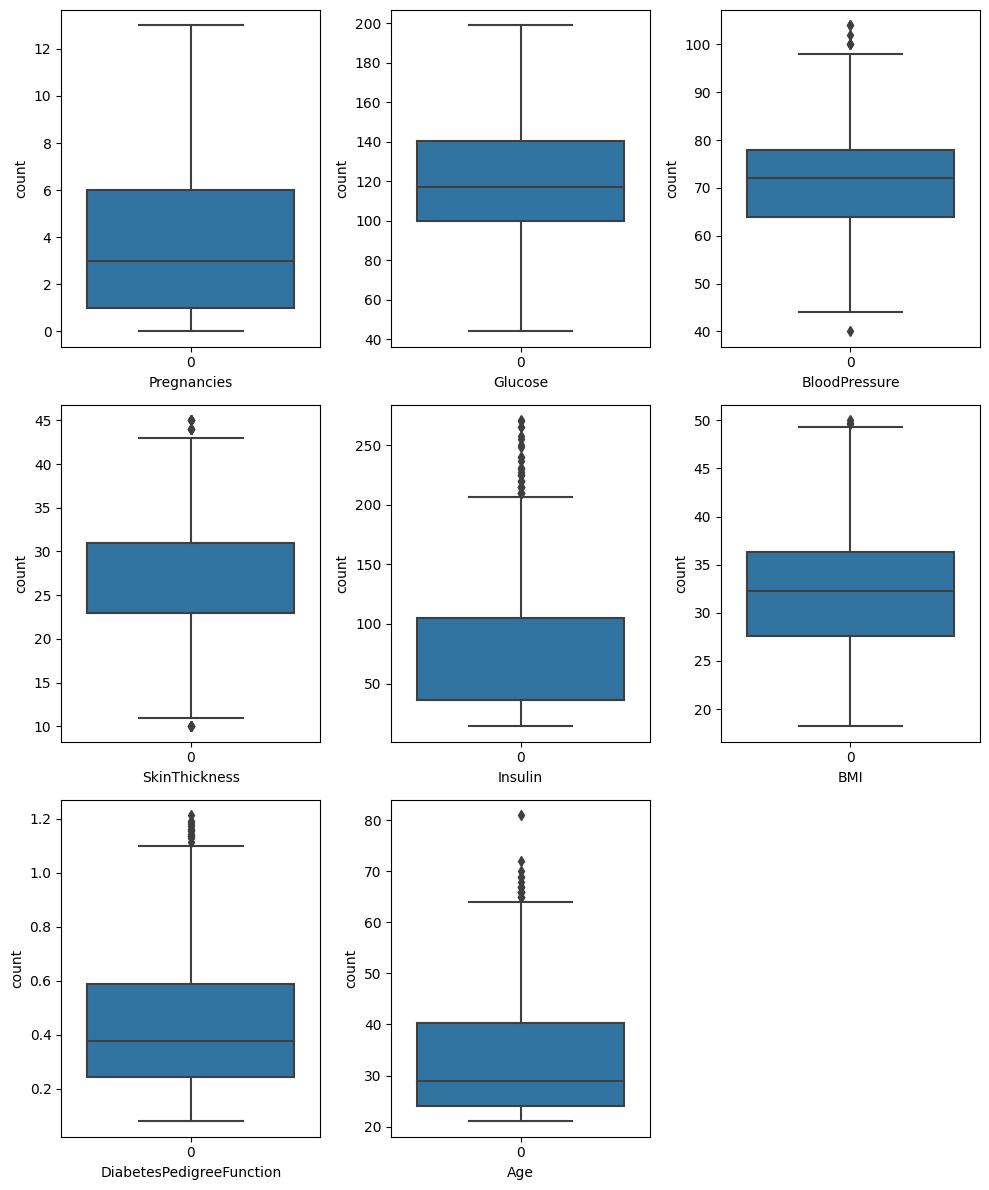

In [56]:
plt.figure(figsize=(10,12))
plotnumber = 1

for column in dataset.iloc[:,:8]:
    if plotnumber <=10:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(dataset[column])
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

In [57]:
dataset.Outcome.value_counts()

Outcome
0    491
1    253
Name: count, dtype: int64

In [58]:
# scaling the dataset
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = scalar.fit_transform(dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [59]:
dataset.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.153846  0.606452        0.34375       0.714286  0.085603  0.484277   
1     0.000000  0.258065        0.65625       0.600000  0.431907  0.628931   
2     0.000000  0.651613        0.50000       0.371429  0.085603  0.817610   
3     0.000000  0.587097        0.43750       0.914286  0.918288  0.757862   
4     0.076923  0.612903        0.34375       0.885714  0.085603  0.707547   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.043172  0.433333        1  
1                  0.136564  0.033333        0  
2                  0.486344  0.166667        1  
3                  0.252863  0.050000        1  
4                  0.403524  0.000000        0

### Feature Selection

<Axes: >

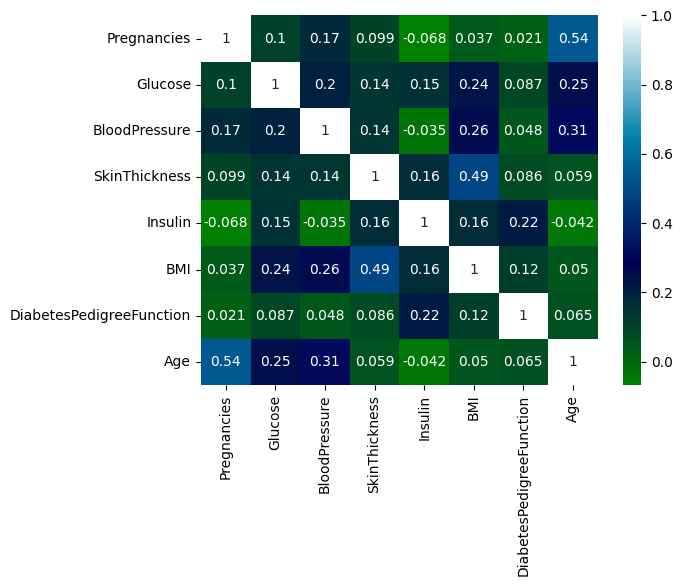

In [60]:
sns.heatmap(dataset.iloc[:,:-1].corr(), annot=True, cmap='ocean')

- No columns have high correlation with each other

In [61]:
# splitting the dependent and independent variable
X = dataset.iloc[:,:-1]
y = dataset.Outcome

In [62]:
# Splitting the dataset into train test model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [63]:
y_train

596    0
76     0
176    0
669    0
481    0
      ..
369    1
320    0
560    1
125    1
265    0
Name: Outcome, Length: 558, dtype: int64

### Logistic Regeression

In [64]:
from sklearn.linear_model import LogisticRegression
Logis_reg = LogisticRegression()
Logis_reg.fit(X_train, y_train)

LogisticRegression()

In [65]:
print('Intercept is :',Logis_reg.intercept_)
print('Coefficient is :',Logis_reg.coef_)

Intercept is : [-5.03336659]
Coefficient is : [[0.84685531 3.91594514 0.53634088 0.66804218 0.19251796 1.89127204
  0.90117191 0.98222818]]


In [66]:
print("Training Score:",Logis_reg.score(X_train, y_train))
print("Test Score:",Logis_reg.score(X_test,y_test))
     

Training Score: 0.7670250896057348
Test Score: 0.7688172043010753


In [67]:
logis_pred = Logis_reg.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [69]:
Score = accuracy_score(y_test,logis_pred)
Classification_Report = classification_report(y_test,logis_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.7688
              precision    recall  f1-score   support

           0       0.76      0.92      0.84       119
           1       0.79      0.49      0.61        67

    accuracy                           0.77       186
   macro avg       0.77      0.71      0.72       186
weighted avg       0.77      0.77      0.75       186



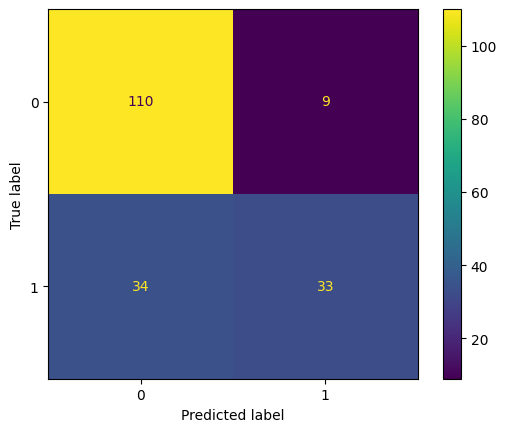

In [70]:
ConfusionMatrixDisplay.from_estimator(Logis_reg, X_test, y_test)

### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
print("Training Score:",des_tree.score(X_train, y_train))
print("Test Score:",des_tree.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.7043010752688172


In [73]:
des_pred = des_tree.predict(X_test)

In [74]:
Score = accuracy_score(y_test,des_pred)
Classification_Report = classification_report(y_test,des_pred)
print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 0.7043
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       119
           1       0.60      0.52      0.56        67

    accuracy                           0.70       186
   macro avg       0.68      0.66      0.67       186
weighted avg       0.70      0.70      0.70       186



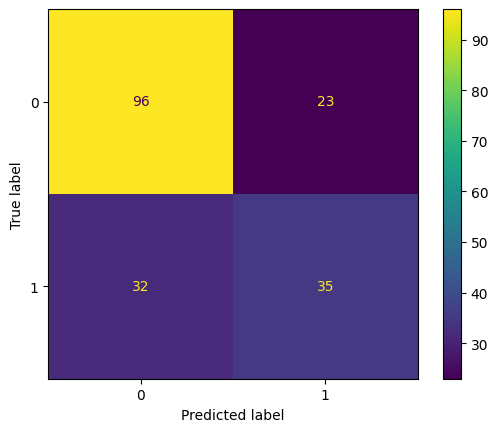

In [75]:
ConfusionMatrixDisplay.from_estimator(des_tree, X_test, y_test)

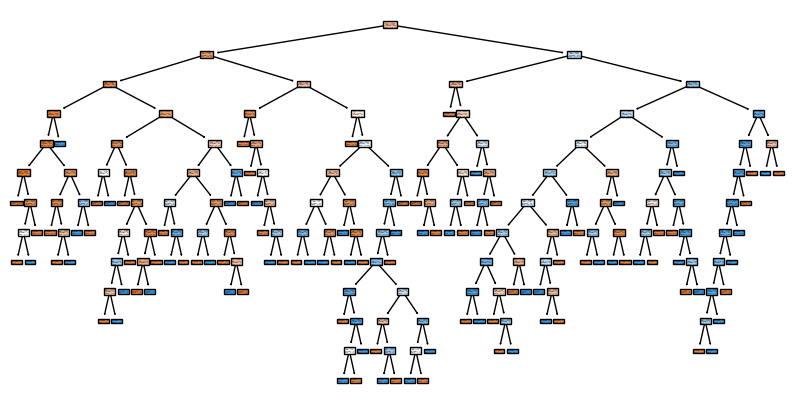

In [76]:
from sklearn import tree
plt.figure(figsize = (10,5))
tree.plot_tree(des_tree,filled = True)
plt.show()

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
print("Training Score:",random_forest.score(X_train, y_train))
print("Test Score:",random_forest.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.7526881720430108


In [79]:
ran_pred = random_forest.predict(X_test)

In [80]:
Score = accuracy_score(y_test,ran_pred)
Classification_Report = classification_report(y_test,ran_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.7527
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       119
           1       0.78      0.43      0.56        67

    accuracy                           0.75       186
   macro avg       0.76      0.68      0.69       186
weighted avg       0.76      0.75      0.73       186



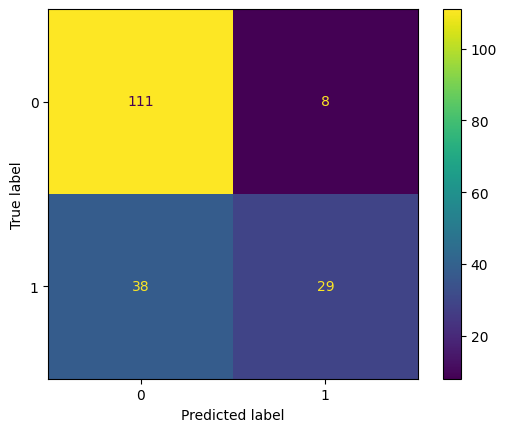

In [81]:
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)

# K_neighbour Classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbour = KNeighborsClassifier()
k_neighbour.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
k_pred = k_neighbour.predict(X_test)

In [84]:
print("Training Score:",k_neighbour.score(X_train, y_train))
print("Test Score:",k_neighbour.score(X_test,y_test))

Training Score: 0.7992831541218638
Test Score: 0.7258064516129032


In [85]:
Score = accuracy_score(y_test,k_pred)
Classification_Report = classification_report(y_test,k_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)
     

KNeighbors Classifier
Accuracy Score value: 0.7258
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       119
           1       0.65      0.51      0.57        67

    accuracy                           0.73       186
   macro avg       0.70      0.68      0.68       186
weighted avg       0.72      0.73      0.72       186



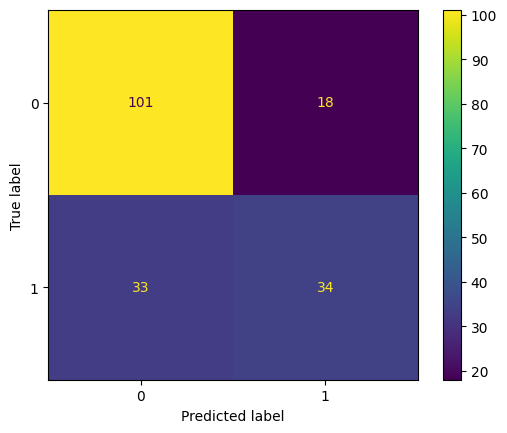

In [86]:
ConfusionMatrixDisplay.from_estimator(k_neighbour, X_test, y_test)

### XG Boost

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
print("Training Score:",xgb.score(X_train, y_train))
print("Test Score:",xgb.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.7258064516129032


In [89]:
xgb_predic = xgb.predict(X_test)

In [90]:
Score = accuracy_score(y_test, xgb_predic)
Classification_Report = classification_report(y_test, xgb_predic)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

XGboost Classifier
Accuracy Score value: 0.7258
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       119
           1       0.67      0.48      0.56        67

    accuracy                           0.73       186
   macro avg       0.71      0.67      0.68       186
weighted avg       0.72      0.73      0.71       186



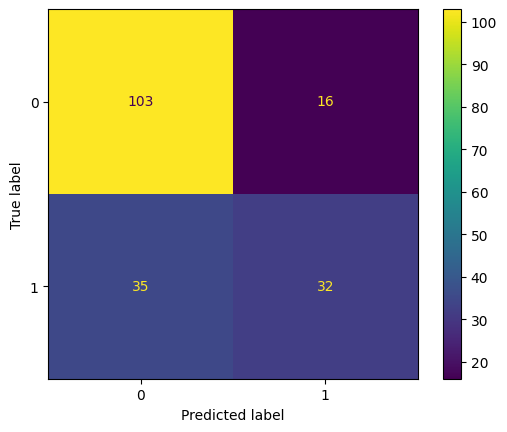

In [91]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

## Accuracy Score Result Summary

|MODEL| ACCURACY SCORE |
| ---------|-----------|
|Logistic Regression Accurracy|74.49%|
|KNeighbors Classifier|71.81%|
|Random Forest Classifier|74.50%|
|Decision Tree Classifier|73.82%|
|XGboost classifier|71.14%|

# HyperParameter Tuning

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params={
 "learning_rate"    : (np.linspace(0,1, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}

Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08080808080808081,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [93]:
Best_xgb = Random_xgb.best_estimator_
Best_xgb.score(X_test,y_test)

0.7311827956989247

In [94]:
Bestxgb_prediction = Best_xgb.predict(X_test)

In [95]:
Score = accuracy_score(y_test, Bestxgb_prediction)
Classification_Report = classification_report(y_test,Bestxgb_prediction)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL XGB
Accuracy Score value: 0.7312
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       119
           1       0.69      0.46      0.55        67

    accuracy                           0.73       186
   macro avg       0.72      0.67      0.68       186
weighted avg       0.72      0.73      0.72       186



### Random Forest classifier Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators" : [10,20,30,40,50,70,80,90,100,110,120,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Random_rf = RandomizedSearchCV(random_forest, params, cv = 10,n_jobs = -1)
Random_rf.fit(X_train, y_train).best_estimator_

C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prvnb\anaconda3\lib\site-packages

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       n_estimators=120)

In [97]:
Best_rf = Random_rf.best_estimator_
Best_rf.score(X_test,y_test)

0.7580645161290323

In [98]:
Bestrf_pred = Best_rf.predict(X_test)

In [99]:
Score = accuracy_score(y_test, Bestrf_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.7581
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       119
           1       0.75      0.49      0.59        67

    accuracy                           0.76       186
   macro avg       0.76      0.70      0.71       186
weighted avg       0.76      0.76      0.74       186



In [100]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 70)